<a href="https://colab.research.google.com/github/Souvik2biswas/Customer-segmentation/blob/main/Kmeanscus_seg2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# **Mounting the Google drive to access the data file**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Reading the data file into a pandas dataframe**

In [ ]:
cusdata = pd.read_csv("/content/drive/MyDrive/DOCS/Mall_Customers.csv")

# Displaying the first five rows of the dataframe
cusdata.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
cusdata['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
cusdata=cusdata.drop('CustomerID',axis=1)

In [ ]:
cusdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
cusdata.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# **Plotting the histograms of the numerical variables with kernel density estimation**

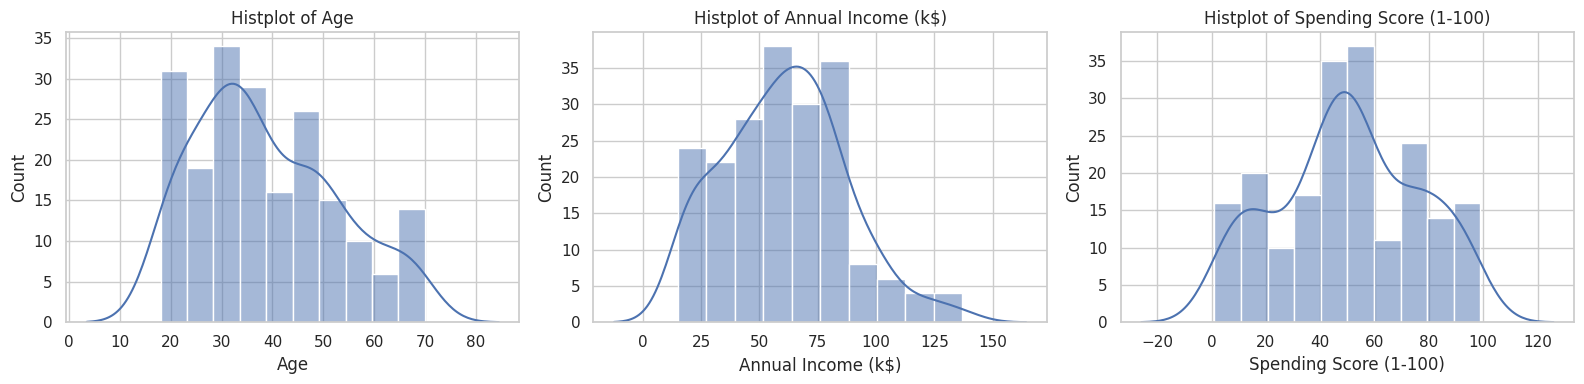

In [ ]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(16,4))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.histplot(cusdata[col] , bins=10, kde=True, kde_kws=dict(cut=3))
    plt.title('Histplot of {}'.format(col))
plt.tight_layout()
plt.show()

# **Plotting the countplot of the categorical variable (Gender)**

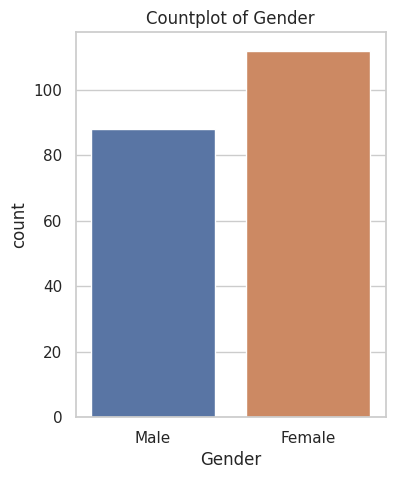

In [ ]:
plt.figure(figsize=(4,5))
sns.countplot(x='Gender', data=cusdata)
plt.title('Countplot of Gender')
plt.show()

# **Plotting the pairplot of the numerical variables with hue as Gender**

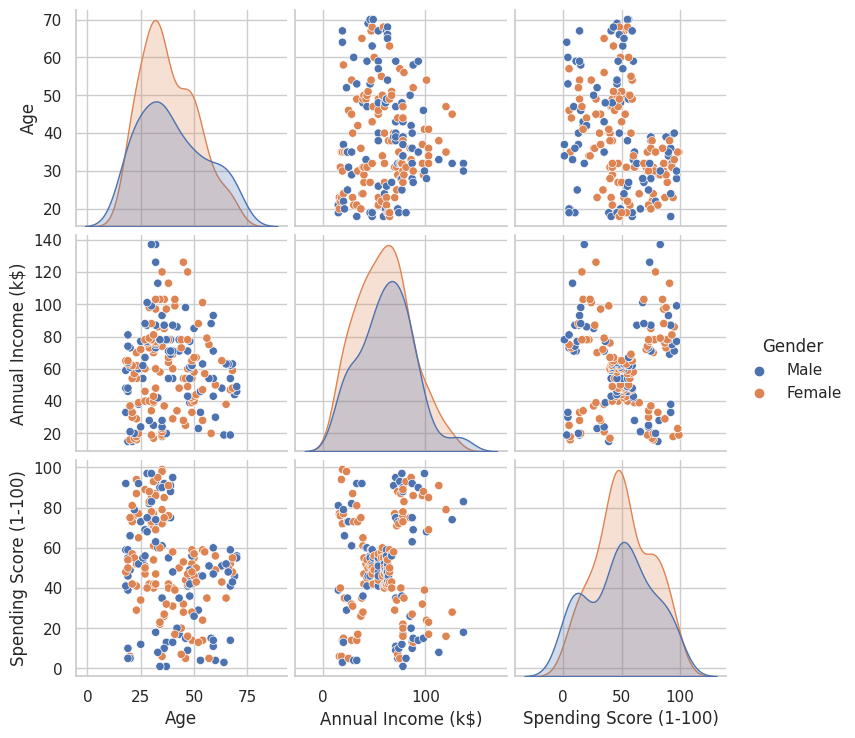

In [ ]:
sns.pairplot(data=cusdata, hue='Gender')
plt.show()

# **Creating a function to find the sum of squared distances for different values of K**

In [ ]:
def try_different_clusters(K, data):

    cluster_values = list(range(1, K+1))
    inertias=[]

    for c in cluster_values:
        model = KMeans(n_clusters = c,init='k-means++',max_iter=400,n_init=10,random_state=42)
        model.fit(data)
        inertias.append(model.inertia_)

    return inertias

# **Applying the function to the data and storing the results in a dataframe**

In [ ]:
outputs = try_different_clusters(12, cusdata[['Age','Annual Income (k$)','Spending Score (1-100)']])
distances = pd.DataFrame({"clusters": list(range(1, 13)),"sum of squared distances": outputs})

In [ ]:
distances

,clusters,sum of squared distances
0,1,308812.780000
1,2,212840.169821
2,3,143342.751572
3,4,104366.151456
4,5,75378.764641
5,6,58302.406309
6,7,51118.949932
7,8,44312.468812
8,9,40894.989782
9,10,37468.515716


# **Plotting the elbow plot to find the optimal value of K**

In [ ]:
figure = go.Figure()
figure.add_trace(go.Scatter(x=distances["clusters"], y=distances["sum of squared distances"]))

figure.update_layout(xaxis = dict(tick0 = 1,dtick = 1,tickmode = 'linear'),
                  xaxis_title="Number of clusters",
                  yaxis_title="Sum of squared distances",
                  title_text="Finding optimal number of clusters using elbow method")
figure.show()

# **Choosing K=5 as the optimal value and fitting the K-means model to the data**

In [ ]:
kmeans_model_new = KMeans(n_clusters = 5,init='k-means++',max_iter=400,n_init=10,random_state=42)

kmeans_model_new.fit_predict(cusdata[['Age','Annual Income (k$)','Spending Score (1-100)']])

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

# **Getting the cluster centers and appending them to a numpy array**

In [ ]:
cluster_centers = kmeans_model_new.cluster_centers_
data = np.expm1(cluster_centers)
points = np.append(data, cluster_centers, axis=1)

In [ ]:
cluster_centers

array([[45.2173913 , 26.30434783, 20.91304348],
       [32.69230769, 86.53846154, 82.12820513],
       [40.32432432, 87.43243243, 18.18918919],
       [43.12658228, 54.82278481, 49.83544304],
       [25.27272727, 25.72727273, 79.36363636]])

In [ ]:
points

array([[4.34173717e+19, 2.65358566e+11, 1.20898074e+09, 4.52173913e+01,
        2.63043478e+01, 2.09130435e+01],
       [1.57793399e+14, 3.82980197e+37, 4.65399911e+35, 3.26923077e+01,
        8.65384615e+01, 8.21282051e+01],
       [3.25560375e+17, 9.36317078e+37, 7.93349385e+07, 4.03243243e+01,
        8.74324324e+01, 1.81891892e+01],
       [5.36582750e+18, 6.44514846e+23, 4.39802724e+21, 4.31265823e+01,
        5.48227848e+01, 4.98354430e+01],
       [9.45814564e+10, 1.49009027e+11, 2.93217129e+34, 2.52727273e+01,
        2.57272727e+01, 7.93636364e+01]])

In [ ]:
data

array([[4.34173717e+19, 2.65358566e+11, 1.20898074e+09],
       [1.57793399e+14, 3.82980197e+37, 4.65399911e+35],
       [3.25560375e+17, 9.36317078e+37, 7.93349385e+07],
       [5.36582750e+18, 6.44514846e+23, 4.39802724e+21],
       [9.45814564e+10, 1.49009027e+11, 2.93217129e+34]])

# **Adding the cluster labels to the array and the dataframe**

In [ ]:
points = np.append(points, [[0], [1], [2], [3], [4]], axis=1)
cusdata["clusters"] = kmeans_model_new.labels_

In [ ]:
cusdata.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,Male,19,15,39,0
1,Male,21,15,81,4
2,Female,20,16,6,0
3,Female,23,16,77,4
4,Female,31,17,40,0


# **Plotting the 3D scatter plot of the clusters**

In [ ]:
figure = px.scatter_3d(cusdata,
                    color='clusters',
                    x="Annual Income (k$)",
                    y="Spending Score (1-100)",
                    z="Age",
                    category_orders = {"clusters": ["0", "1", "2", "3", "4"]}
                    )
figure.update_layout()
figure.show()

In [ ]:
# Selecting the relevant columns from the dataframe
df1=cusdata[["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

# **Fitting the K-means model to the selected columns**

In [ ]:
km1=KMeans(n_clusters=5,n_init=10)
km1.fit(X)

# Predicting the cluster labels for the selected columns
y=km1.predict(X)

# Adding the cluster labels to the dataframe
df1["label"] = y

# **Plotting the 2D scatter plot of the clusters**

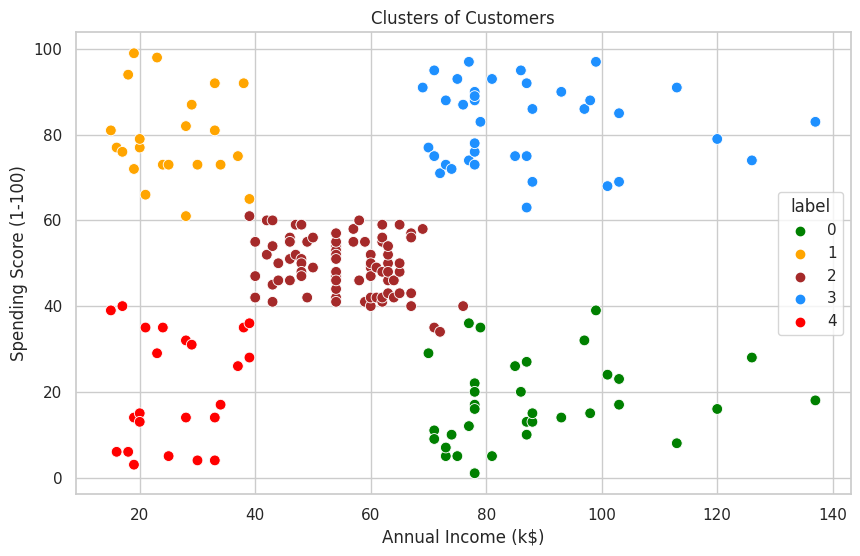

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",palette=['green','orange','brown','dodgerblue','red'], legend='full',data =df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.show()

In [ ]:
df1.label.value_counts()

2    81
3    39
0    35
4    23
1    22
Name: label, dtype: int64